In [11]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [12]:
TRAIN_DIR = ('C:/Users/shahe/Desktop/Lyme Disease/Train/')
TEST_DIR = ('C:/Users/shahe/Desktop/Lyme Disease/Validation/')

In [13]:
# re-size all the images to a size VGG-16 expects.
IMAGE_SIZE = [224, 224]

# Set the batch size
BATCH_SIZE = 32  # try reducing batch size or freeze more layers if your GPU runs out of memory
NUM_EPOCHS = 5
LEARNING_RATE = 0.00001
NUM_CLASSES = 2 # We are aware of it.

In [14]:
import os
CLASSES = os.listdir(TRAIN_DIR)
NUM_CLASSES = len(CLASSES)
print("Class --> {} \n and the length is : {}".format(CLASSES, NUM_CLASSES))

Class --> ['Lyme_Negative', 'Lyme_Positive'] 
 and the length is : 2


In [15]:
# Image Data Augmentation

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [16]:
# Import the images from the train dataset.
# Make sure to provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(
    directory = TRAIN_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 357 images belonging to 2 classes.


In [17]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
test_set = test_datagen.flow_from_directory(
    directory = TEST_DIR,
    target_size = (224, 224),
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 87 images belonging to 2 classes.


In [19]:
# Import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [20]:
# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False

In [21]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

prediction = Dense(NUM_CLASSES, activation='softmax')(x)

In [22]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [23]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [24]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
history = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
12/12 [==============================] - 121s 10s/step - loss: 0.6625 - acc: 0.6779 - val_loss: 0.7939 - val_acc: 0.5172
Epoch 2/15
12/12 [==============================] - 119s 10s/step - loss: 0.6529 - acc: 0.6336 - val_loss: 0.4586 - val_acc: 0.8276
Epoch 3/15
12/12 [==============================] - 120s 10s/step - loss: 0.5246 - acc: 0.7433 - val_loss: 0.5290 - val_acc: 0.6782
Epoch 4/15
12/12 [==============================] - 120s 10s/step - loss: 0.4677 - acc: 0.7593 - val_loss: 0.5026 - val_acc: 0.7816
Epoch 5/15
12/12 [==============================] - 124s 10s/step - loss: 0.3723 - acc: 0.8272 - val_loss: 0.4761 - val_acc: 0.8046
Epoch 6/15
12/12 [==============================] - 124s 10s/step - loss: 0.3494 - acc: 0.8612 - val_loss: 0.4632 - val_acc: 0.7586
Epoch 7/15
12/12 [==============================] - 122s 10s/step - loss: 0.3201 - acc: 0.8744 - val_loss: 0.4803 - val_acc: 0.7356
Epoch 8/15
12/12 [==============================] - 121s 10s/step - loss: 0.

In [34]:
#['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented'] 
def model_predict(img, actual):
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x_processed = preprocess_input(x)
    result = model.predict(x_processed)
    result = np.argmax(np.array(result))

    if result == 0: result = 'Positive'
    elif result == 1: result = 'Negative'
        
    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))
    

In [35]:
#'C:/Users/shahe/Desktop/Lyme Disease/Validation/
img1 = image.load_img("C:/Users/shahe/Desktop/Lyme Disease/Validation/Lyme_Negative/fixed drug reaction7.jpg", target_size=(224,224))
img2 = image.load_img("C:/Users/shahe/Desktop/Lyme Disease/Validation/Lyme_Positive/erythema migrans5.jpg", target_size=(224,224))

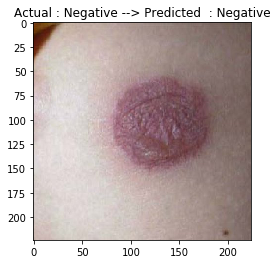

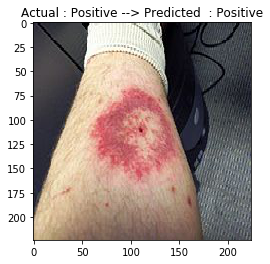

In [36]:
model_predict(img1, "Negative")
model_predict(img2, "Positive")